In [42]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [43]:
# File Path
test_path='/content/test.csv'
train_path='/content/train.csv'
submission_path='/content/sample_submission.csv'

In [44]:
# Reading the dataset
train=pd.read_csv(train_path)
test=pd.read_csv(test_path)
submission=pd.read_csv(submission_path)

In [45]:
# Finding shape of all dataset
print(' shape of the train  dataset :', train.shape)
print(' shape of the test synthetic dataset:', test.shape)
print(' shape of the submission dataset :', submission.shape)

 shape of the train  dataset : (136950, 6)
 shape of the test synthetic dataset: (27375, 5)
 shape of the submission dataset : (27375, 2)


In [46]:
# Convert date column in Date type format
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        136950 non-null  int64         
 1   date      136950 non-null  datetime64[ns]
 2   country   136950 non-null  object        
 3   store     136950 non-null  object        
 4   product   136950 non-null  object        
 5   num_sold  136950 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 6.3+ MB


In [48]:
train.describe()

,id,num_sold
count,136950.00000,136950.000000
mean,68474.50000,165.522636
std,39534.20402,183.691575
min,0.00000,2.000000
25%,34237.25000,46.000000
50%,68474.50000,98.000000
75%,102711.75000,184.000000
max,136949.00000,1380.000000


In [49]:
train['product'].unique()

array(['Using LLMs to Improve Your Coding',
       'Using LLMs to Train More LLMs',
       'Using LLMs to Win Friends and Influence People',
       'Using LLMs to Win More Kaggle Competitions',
       'Using LLMs to Write Better'], dtype=object)

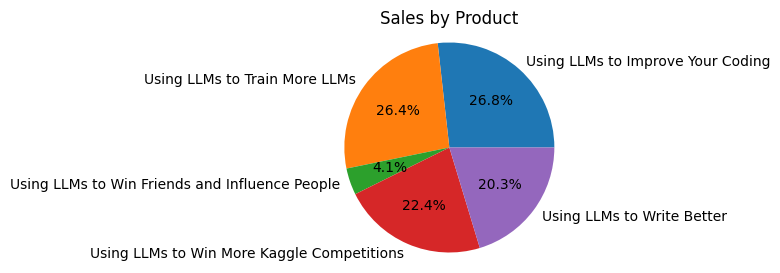

In [50]:
product_sales = train.groupby('product')['num_sold'].sum()
plt.figure(figsize=(6, 3))
plt.pie(product_sales.values, labels=product_sales.index, autopct='%1.1f%%')
plt.title('Sales by Product')
plt.axis('equal')
plt.show()

In [51]:
country_group = train.groupby('country').agg({'num_sold': ['sum', 'mean']})
store_group = train.groupby('store').agg({'num_sold': ['sum', 'mean']})
product_group = train.groupby('product').agg({'num_sold': ['sum', 'mean']})

print("Grouped by 'country':")
print(country_group)

print("---------------------------------End--------------------------------------------")

print("\nGrouped by 'store':")
print(store_group)

print("---------------------------------End--------------------------------------------")

print("\nGrouped by 'product':")
print(product_group)

Grouped by 'country':
          num_sold            
               sum        mean
country                       
Argentina  1683244   61.454691
Canada     7013114  256.046513
Estonia    3577319  130.606754
Japan      6013786  219.561373
Spain      4380862  159.943848
---------------------------------End--------------------------------------------

Grouped by 'store':
              num_sold            
                   sum        mean
store                             
Kagglazon     15661335  343.074151
Kaggle Learn   2755934   60.370953
Kaggle Store   4251056   93.122804
---------------------------------End--------------------------------------------

Grouped by 'product':
                                               num_sold            
                                                    sum        mean
product                                                            
Using LLMs to Improve Your Coding               6069281  221.587477
Using LLMs to Train More LLMs             

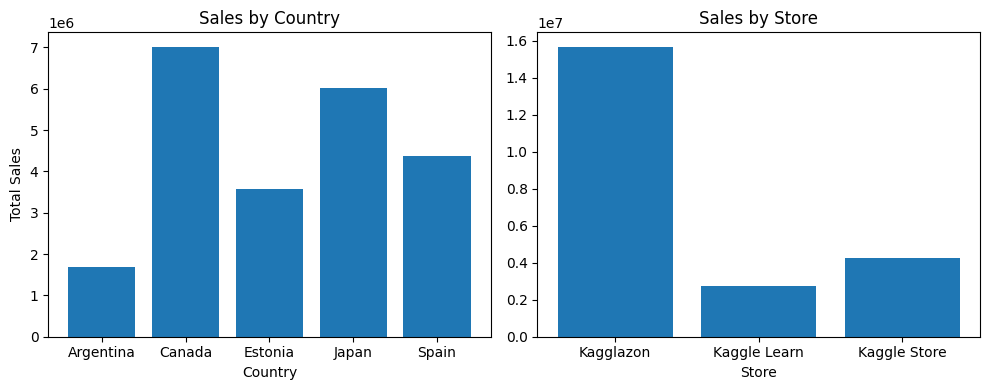

In [52]:
country_sales = train.groupby('country')['num_sold'].sum()
store_sales = train.groupby('store')['num_sold'].sum()
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(country_sales.index, country_sales.values)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Sales by Country')

plt.subplot(1,2,2)
plt.bar(store_sales.index, store_sales.values)
plt.xlabel('Store')
plt.title('Sales by Store')

plt.tight_layout()
plt.show()

#**Feature Engineering**

In [53]:
train['Day'] = train['date'].dt.day
train['Month'] = train['date'].dt.month
train['Year'] = train['date'].dt.year

In [54]:
train['Day']=train['Day'].astype(int)
train['Month']=train['Month'].astype(int)
train['Year']=train['Year'].astype(int)
train['num_sold']=train['num_sold'].astype(int)

In [55]:
test['Day'] = test['date'].dt.day
test['Month'] = test['date'].dt.month
test['Year'] = test['date'].dt.year

In [56]:
test['Day']=test['Day'].astype(int)
test['Month']=test['Month'].astype(int)
test['Year']=test['Year'].astype(int)


In [57]:
train.shape

(136950, 9)

In [58]:
test.shape

(27375, 8)

In [59]:
train=train.drop(['date'],axis=1)
test=test.drop(['date'],axis=1)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   country   136950 non-null  object
 2   store     136950 non-null  object
 3   product   136950 non-null  object
 4   num_sold  136950 non-null  int64 
 5   Day       136950 non-null  int64 
 6   Month     136950 non-null  int64 
 7   Year      136950 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 8.4+ MB


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27375 entries, 0 to 27374
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       27375 non-null  int64 
 1   country  27375 non-null  object
 2   store    27375 non-null  object
 3   product  27375 non-null  object
 4   Day      27375 non-null  int64 
 5   Month    27375 non-null  int64 
 6   Year     27375 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.5+ MB


In [62]:
train.head()

,id,country,store,product,num_sold,Day,Month,Year
0,0,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,1,2017
1,1,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,1,2017
2,2,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,1,2017
3,3,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,1,2017
4,4,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,1,2017


In [63]:
train.isnull().sum()

id          0
country     0
store       0
product     0
num_sold    0
Day         0
Month       0
Year        0
dtype: int64

In [64]:
test.isnull().sum()

id         0
country    0
store      0
product    0
Day        0
Month      0
Year       0
dtype: int64

In [65]:
train.dtypes

id           int64
country     object
store       object
product     object
num_sold     int64
Day          int64
Month        int64
Year         int64
dtype: object

In [66]:
test.dtypes

id          int64
country    object
store      object
product    object
Day         int64
Month       int64
Year        int64
dtype: object

In [67]:
train = pd.get_dummies(train, columns=['country', 'store', 'product'])

In [68]:
train.head()

,id,num_sold,Day,Month,Year,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,0,63,1,1,2017,1,0,0,0,0,0,1,0,1,0,0,0,0
1,1,66,1,1,2017,1,0,0,0,0,0,1,0,0,1,0,0,0
2,2,9,1,1,2017,1,0,0,0,0,0,1,0,0,0,1,0,0
3,3,59,1,1,2017,1,0,0,0,0,0,1,0,0,0,0,1,0
4,4,49,1,1,2017,1,0,0,0,0,0,1,0,0,0,0,0,1


In [69]:
test = pd.get_dummies(test, columns=['country', 'store', 'product'])

In [70]:
test.head()

,id,Day,Month,Year,country_Argentina,country_Canada,country_Estonia,country_Japan,country_Spain,store_Kagglazon,store_Kaggle Learn,store_Kaggle Store,product_Using LLMs to Improve Your Coding,product_Using LLMs to Train More LLMs,product_Using LLMs to Win Friends and Influence People,product_Using LLMs to Win More Kaggle Competitions,product_Using LLMs to Write Better
0,136950,1,1,2022,1,0,0,0,0,0,1,0,1,0,0,0,0
1,136951,1,1,2022,1,0,0,0,0,0,1,0,0,1,0,0,0
2,136952,1,1,2022,1,0,0,0,0,0,1,0,0,0,1,0,0
3,136953,1,1,2022,1,0,0,0,0,0,1,0,0,0,0,1,0
4,136954,1,1,2022,1,0,0,0,0,0,1,0,0,0,0,0,1


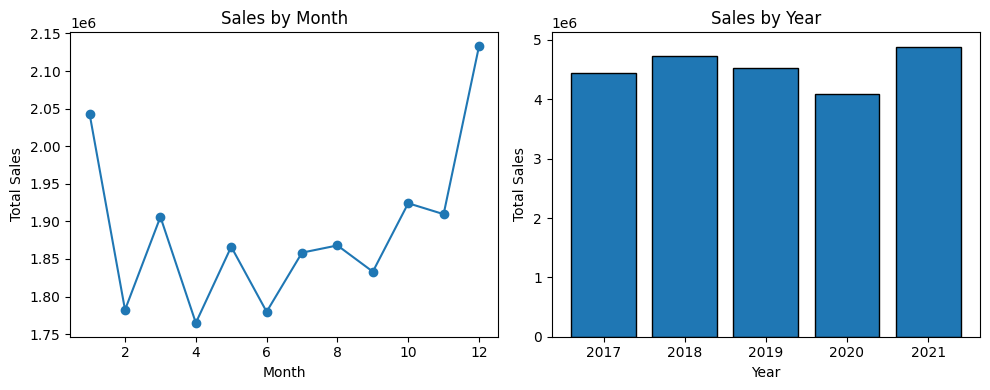

In [71]:
monthly_sales = train.groupby('Month')['num_sold'].sum()
year_sales = train.groupby('Year')['num_sold'].sum()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Month')

plt.subplot(1,2,2)
plt.bar(year_sales.index, year_sales.values, edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales by Year')



plt.tight_layout()
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [73]:
X = train.drop('num_sold', axis=1)
y = train['num_sold']

In [130]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
# formula for Symmetric mean absolute percentage error
def SMAPE(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [114]:
# Initialize and fit the linear regression model
regression_model = LinearRegression()
regression_model_fit=regression_model.fit(X_train_scaled, y_train)
LrError = SMAPE(y_train, regression_model_fit.predict(X_train_scaled))
LrError

59.82589354939388

In [116]:
# importing Light Gradient Boosting Machine Regressor
from lightgbm import LGBMRegressor

lgbmRegressor = LGBMRegressor()
lgbmRegressor_model_fit=lgbmRegressor.fit(X_train_scaled, y_train)
lgbmError = SMAPE(y_train, lgbmRegressor_model_fit.predict(X_train_scaled))
lgbmError

9.796875634915889

In [117]:
# importing GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

gbRegressor = GradientBoostingRegressor()
gbRegressor_model_fit=gbRegressor.fit(X_train_scaled, y_train)
gbError = SMAPE(y_train, gbRegressor.predict(X_train_scaled))
gbError

24.222259158566594

# Installing  catboost Library


In [ ]:
pip install catboost

In [118]:
# importing CatBoostRegressor

from catboost import CatBoostRegressor
cbRegressor = CatBoostRegressor()
cbRegressor_model_fit=cbRegressor.fit(X_train_scaled, y_train, silent=True)
cbError = SMAPE(y_train, cbRegressor_model_fit.predict(X_train_scaled))
cbError

7.756307379471349

In [119]:
# importing Extreme Gradient Boosting

from xgboost.sklearn import XGBRegressor
xgbRegressor = CatBoostRegressor()
xgbRegressor_model_fit=xgbRegressor.fit(X_train_scaled, y_train, silent=True)
xgbError = SMAPE(y_train, xgbRegressor_model_fit.predict(X_train_scaled))
xgbError

7.756307379471349

In [111]:
# importing Random forest regressor

from sklearn.ensemble import RandomForestRegressor
rfRegressor = RandomForestRegressor()
rfRegressor_model_fit=rfRegressor.fit(X_train_scaled, y_train)
rfError = SMAPE(y_train, rfRegressor_model_fit.predict(X_train_scaled))
rfError

2.758412377764365

In [113]:
from sklearn.neighbors import KNeighborsRegressor

k = 3  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor_fit=knn_regressor.fit(X_train_scaled, y_train)
Knnerror = SMAPE(y_train, knn_regressor_fit.predict(X_train_scaled))
Knnerror

5.089933406872062

In [145]:
# converting all SMAPE error values of different machine learning model into a DataFrame

errors = [LrError, lgbmError, gbError, cbError, xgbError, rfError,Knnerror]
dataPerf = pd.DataFrame(data={'Model': ['LinearRegression', 'LGBM', 'GradientBoosting', 'CatBoost', 'XGB', 'RandomForest','KNeighborsRegressor'], 'Error': errors})
dataPerf.sort_values(by='Error', ascending=False, inplace=True)

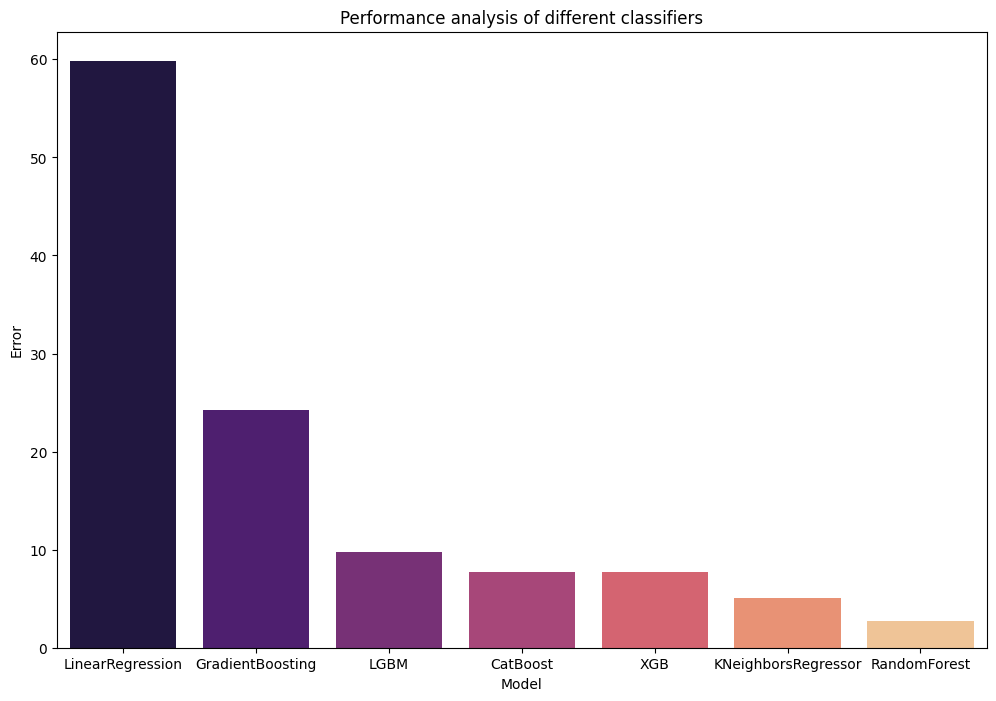

In [146]:
plt.figure(figsize=(12, 8))
sns.barplot(x="Model", y="Error", data=dataPerf, palette="magma")
plt.title('Performance analysis of different classifiers')
plt.show()

In [86]:
print(f'Minimum SMAPE: {min(errors)}')

Minimum SMAPE: 2.7626610655215904


In [87]:
test.shape

(27375, 17)

In [131]:
test_data_scaled = scaler.transform(test)

In [132]:
test_pred = rfRegressor.predict(test_data_scaled)

In [133]:
submission_01= pd.read_csv("/content/sample_submission.csv")
submission_01.columns=["id","num_sold"]
submission_01["num_sold"]=test_pred
submission_01.to_csv("submission03.csv",index=False)